In [101]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [102]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [103]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       [[251, 251, 251],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

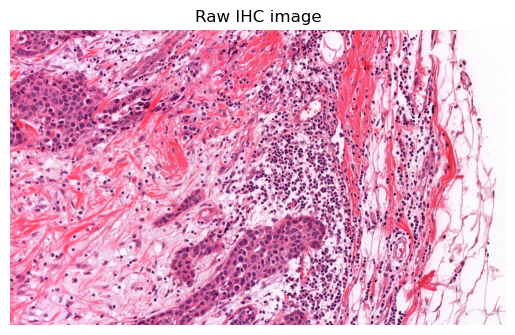

In [104]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [105]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[252.65434783  61.56521739  93.22608696]
[73.24444444 17.88888889 83.01111111]
[253.04947653 252.99819881 253.87267815]


### Inspect ROIs of stains and background to ensure correct stain color selection

#fc3d5d
#491153
#fdfcfd


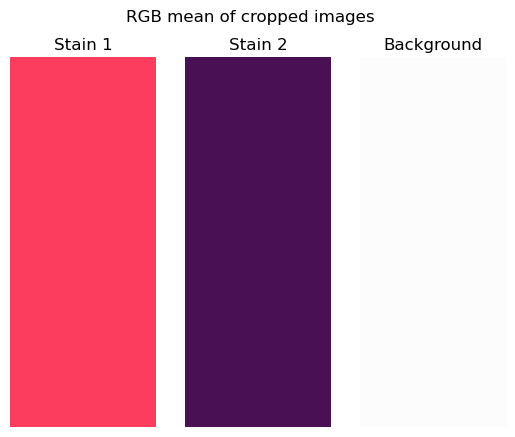

In [106]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [107]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background / mean_img_stain1
T_stain2 = mean_img_background / mean_img_stain2
OD_stain1 = -np.log10(T_stain1)
OD_stain2 = -np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[-0.00067867 -0.61378201 -0.43507851]
[-0.53843075 -1.15053406 -0.48547974]


### Normalize the absorbances to vector lengths

In [108]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[  1.         904.39347665 641.07803351]
[1.10906947 2.369891   1.        ]


### Form a deconvolution matrix

In [109]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[  1.           1.10906947]
 [904.39347665   2.369891  ]
 [641.07803351   1.        ]]
M transposed
[[-1.63601298e-03  2.62760685e-04  1.19173786e-03]
 [ 7.22136526e-01  2.08753949e-01 -2.95623678e-01]]
Inversed M transposed multiplied with M
[[ 1.00000000e+00 -8.67361738e-19]
 [-1.42108547e-13  1.00000000e+00]]
Deconvolution matrix, D
[[-1.63601298e-03  2.62760685e-04  1.19173786e-03]
 [ 7.22136526e-01  2.08753949e-01 -2.95623678e-01]]


### Calculate the coefficient for each stain 

In [110]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background / img_ihc


#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [111]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = -np.log10(T_img_ihc)

#Coefficient matrix
coeffs = np.dot(np.reshape(OD_img_ihc, (-1, 3)), D.T)
coeff_stain1 = coeffs[:, 0]
coeff_stain2 = coeffs[:, 1]


#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(8951993,)
(8951993,)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [112]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[0.02027902, 0.04333278, 0.01828472],
        [0.01883972, 0.04025724, 0.01698696],
        [0.0146216 , 0.03124385, 0.01318366],
        ...,
        [0.00042009, 0.00089766, 0.00037878],
        [0.00216201, 0.00461984, 0.00194939],
        [0.00042009, 0.00089766, 0.00037878]],

       [[0.03245298, 0.06934644, 0.02926145],
        [0.02389273, 0.05105466, 0.02154304],
        [0.01453432, 0.03105736, 0.01310497],
        ...,
        [0.00077759, 0.00166157, 0.00070112],
        [0.00163899, 0.00350223, 0.0014778 ],
        [0.00038707, 0.0008271 , 0.00034901]],

       [[0.03299253, 0.07049937, 0.02974794],
        [0.02357916, 0.05038462, 0.02126031],
        [0.01555281, 0.03323369, 0.0140233 ],
        ...,
        [0.00077759, 0.00166157, 0.00070112],
        [0.00100705, 0.00215188, 0.00090801],
        [0.00100705, 0.00215188, 0.00090801]],

       ...,

       [[0.00911415, 0.01947538, 0.00821784],
        [0.00952737, 0.02035836, 0.00859042],
        [0.00857641, 0

### Convert the image absorbance to image transmittance  

In [113]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10 ** (-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10 ** (-OD_img_ihc_stain2)

array([[[0.95437923, 0.90503884, 0.95877187],
        [0.9575474 , 0.9114708 , 0.96164116],
        [0.96689297, 0.93058523, 0.97009962],
        ...,
        [0.99903317, 0.99793519, 0.99912821],
        [0.99503417, 0.98941881, 0.99552143],
        [0.99903317, 0.99793519, 0.99912821]],

       [[0.92799796, 0.85241986, 0.93484273],
        [0.94647091, 0.88908922, 0.95160554],
        [0.96708729, 0.93098491, 0.97027542],
        ...,
        [0.99821114, 0.99618139, 0.99838692],
        [0.99623321, 0.99196824, 0.99660301],
        [0.99910913, 0.99809733, 0.99919671]],

       [[0.92684576, 0.85015992, 0.93379611],
        [0.94715452, 0.89046198, 0.95222524],
        [0.96482197, 0.92633123, 0.96822591],
        ...,
        [0.99821114, 0.99618139, 0.99838692],
        [0.99768388, 0.99505736, 0.99791141],
        [0.99768388, 0.99505736, 0.99791141]],

       ...,

       [[0.97923256, 0.95614689, 0.98125563],
        [0.97830129, 0.95420489, 0.98041417],
        [0.98044579, 0

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [114]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1 > 1] = 1
T_img_ihc_stain2[T_img_ihc_stain2 > 1] = 1
T_img_ihc_stain1[T_img_ihc_stain1 < 0] = 0
T_img_ihc_stain2[T_img_ihc_stain2 < 0] = 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [115]:
#Start coding here

T_img_ihc_stain1_norm = (T_img_ihc_stain1 * 255).astype(np.uint8)

T_img_ihc_stain2_norm = (T_img_ihc_stain2 * 255).astype(np.uint8)

#End coding here


array([[[243, 230, 244],
        [244, 232, 245],
        [246, 237, 247],
        ...,
        [254, 254, 254],
        [253, 252, 253],
        [254, 254, 254]],

       [[236, 217, 238],
        [241, 226, 242],
        [246, 237, 247],
        ...,
        [254, 254, 254],
        [254, 252, 254],
        [254, 254, 254]],

       [[236, 216, 238],
        [241, 227, 242],
        [246, 236, 246],
        ...,
        [254, 254, 254],
        [254, 253, 254],
        [254, 253, 254]],

       ...,

       [[249, 243, 250],
        [249, 243, 250],
        [250, 244, 250],
        ...,
        [252, 250, 253],
        [251, 248, 252],
        [254, 253, 254]],

       [[249, 243, 250],
        [248, 242, 249],
        [249, 242, 249],
        ...,
        [253, 251, 253],
        [252, 250, 253],
        [253, 251, 253]],

       [[249, 242, 249],
        [248, 242, 249],
        [248, 241, 249],
        ...,
        [253, 251, 253],
        [253, 252, 253],
        [254, 253, 254]]

### Visualize deconvolved images

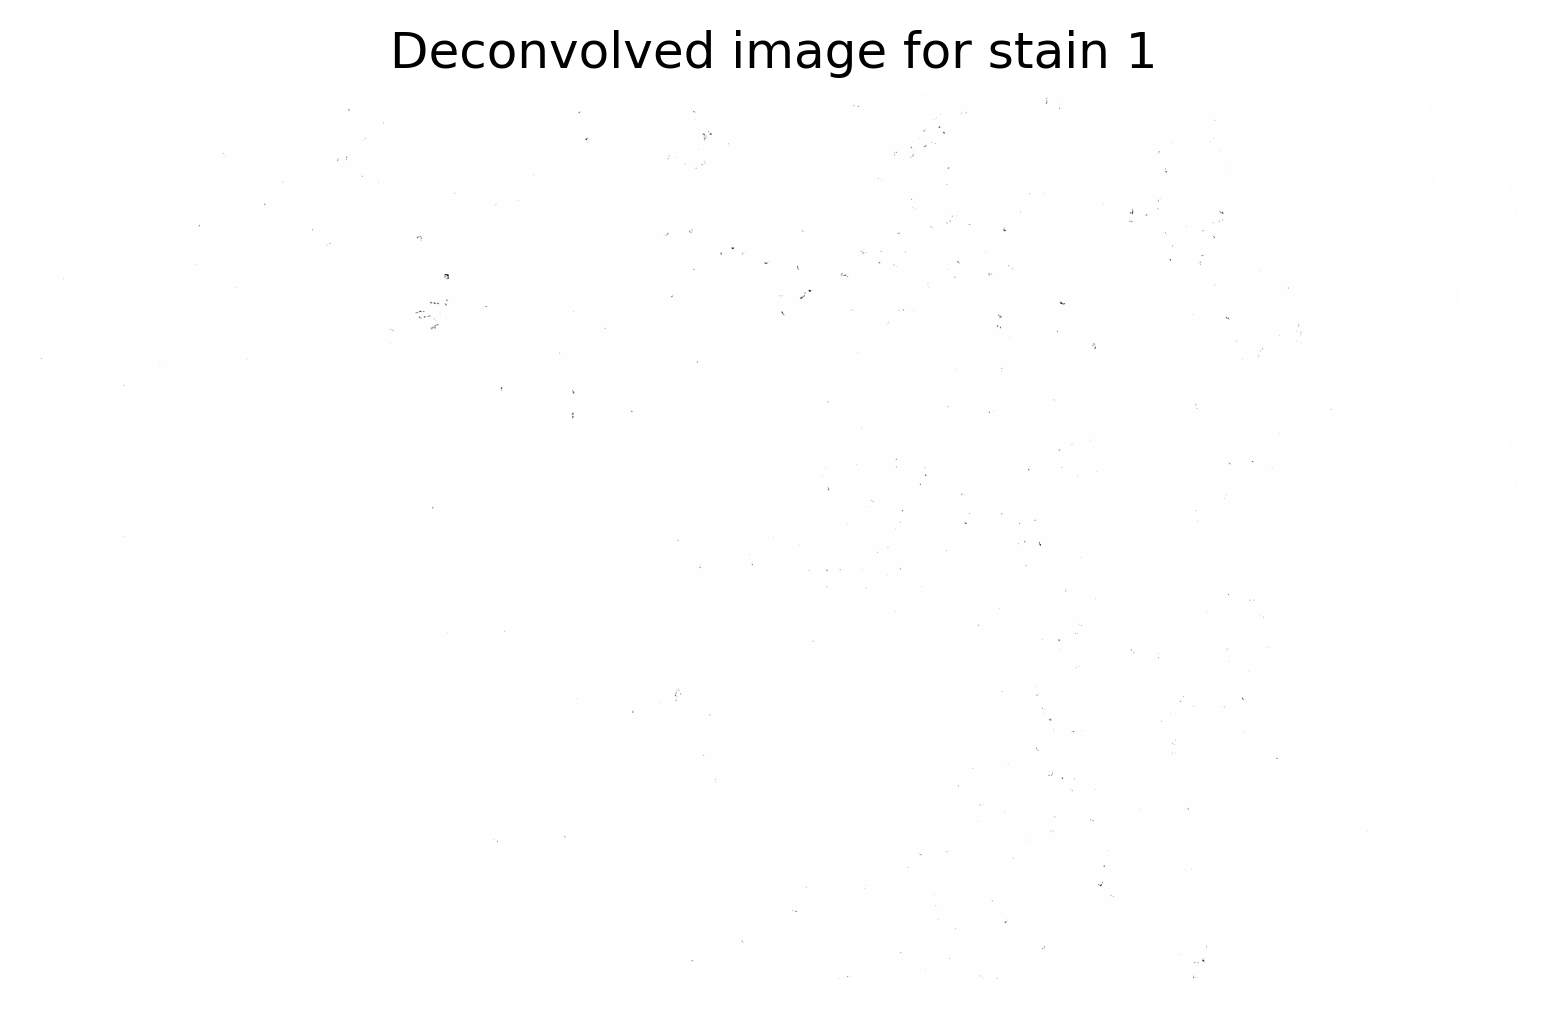

In [116]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')

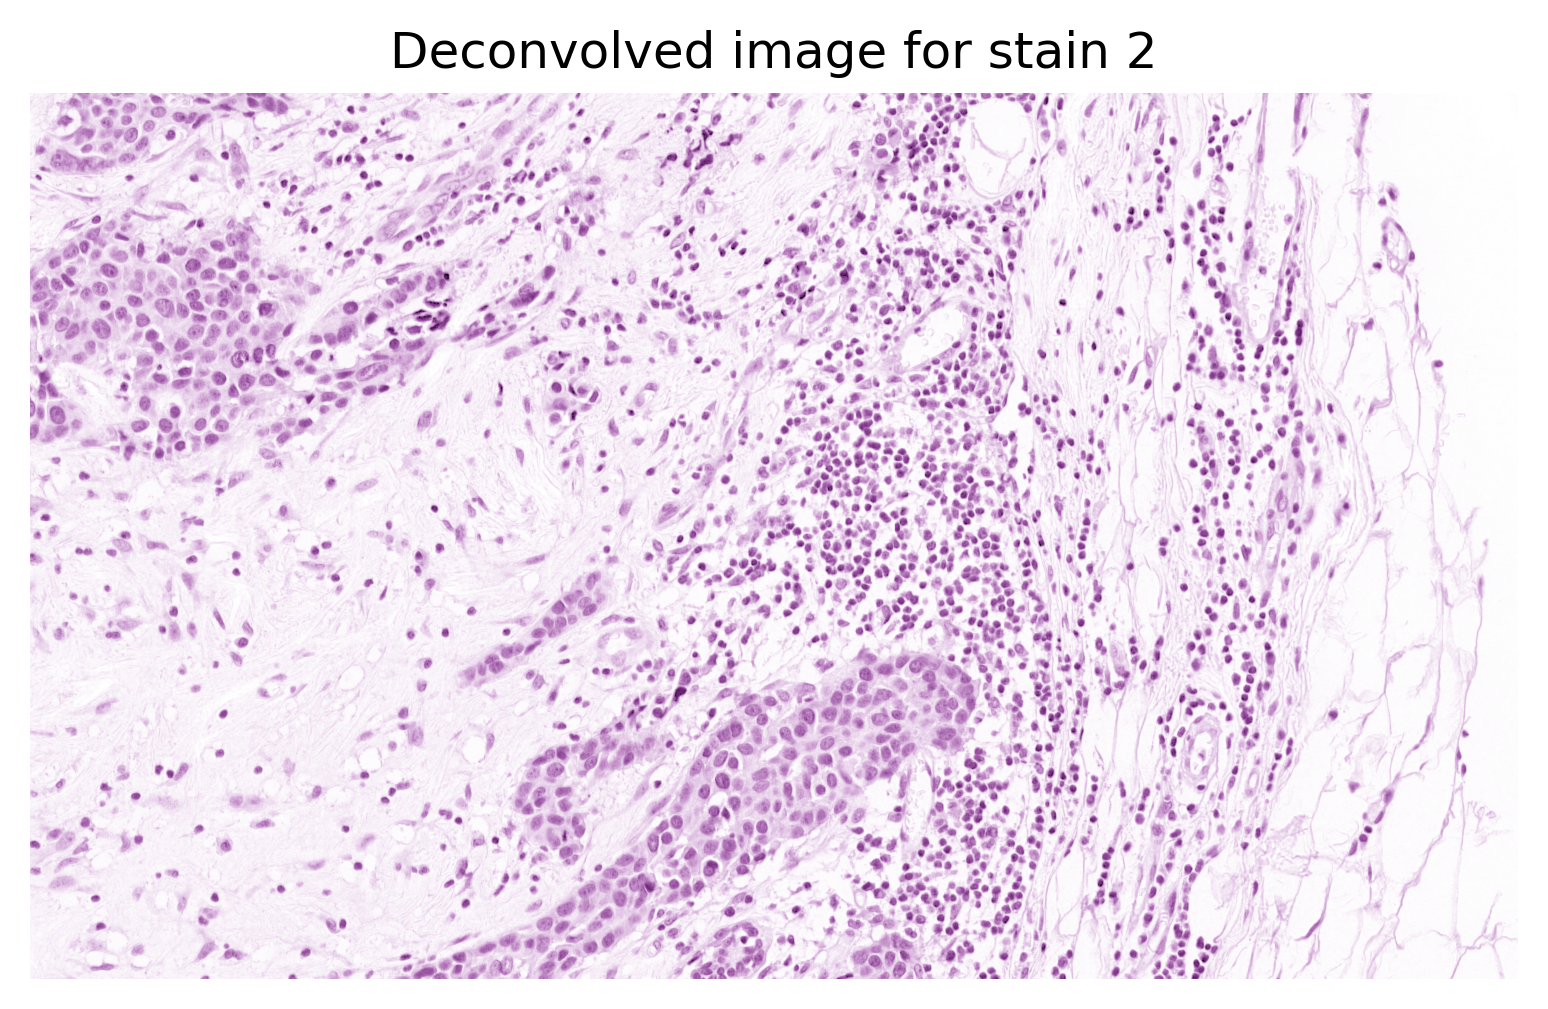

In [117]:
#Display and export deconvolved image for stain 2
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')

In [118]:
print("Coefficients for stain 1:", coeff_stain1)
print("Coefficients for stain 2:", coeff_stain2)

Coefficients for stain 1: [-4.04294745e-04 -3.85626504e-04 -3.65235699e-04 ...  6.79651928e-06
  4.41752005e-06  2.04797283e-06]
Coefficients for stain 2: [-0.03766319 -0.03499005 -0.02715595 ... -0.00524654 -0.00363119
 -0.00202227]
